<a href="https://colab.research.google.com/github/suspenseful3day/sun2/blob/main/202110930_%EB%B0%95%EC%A3%BC%EC%84%B1_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%992_5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

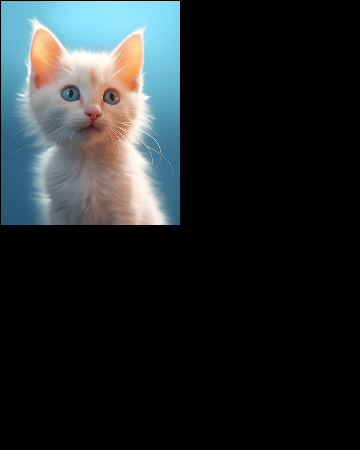

-1

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/My Drive/a.jpg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0),img.item(y_,x_,0))
      dst.itemset((y,x,1),img.item(y_,x_,1))
      dst.itemset((y,x,2),img.item(y_,x_,2))

result=cv2.hconcat([img,dst])
cv2_imshow(dst)
cv2.waitKey(0)

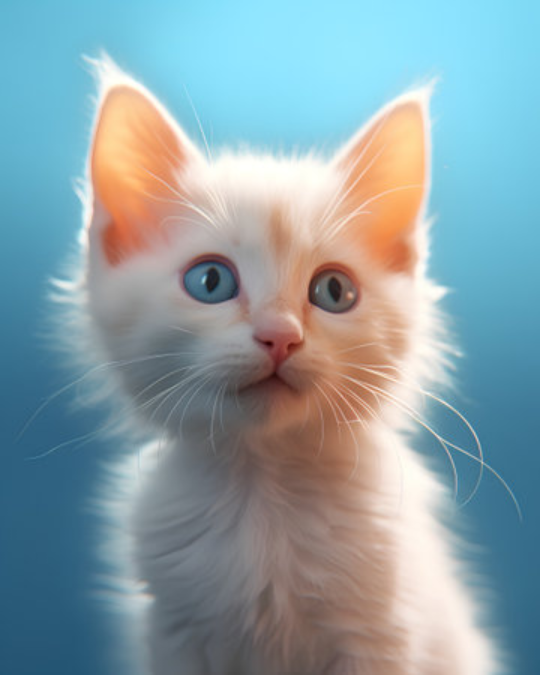

-1

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/My Drive/a.jpg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
dst=cv2.resize(img,(int(width*1.5),int(height*1.5)))

cv2_imshow(dst)
cv2.waitKey(0)

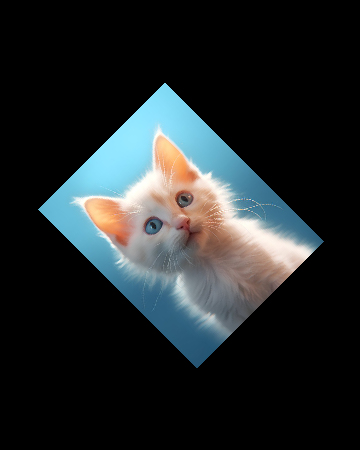

-1

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/My Drive/a.jpg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_matrix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2
rotation_matrix=np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])

T=np.eye(3)
T=np.dot(scaling_matrix,T)
T=np.dot(translation_matrix,T)
T=np.dot(rotation_matrix,T)
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(T)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0),img.item(y_,x_,0))
      dst.itemset((y,x,1),img.item(y_,x_,1))
      dst.itemset((y,x,2),img.item(y_,x_,2))

cv2_imshow(dst)
cv2.waitKey(0)